# Homework 4 - Andrea Lazzari


1) Generate a random a $SxS$ matrix with $C$ non zero entries and $1-C$ zeros ($C$ is between zero and one). Set the diagonal to $-d$. The non-zero elements are drawn  from a given distributions. 
Calculate the eigenvalues. Repeat different realizations and plot all the eigenvalues in the complex plane [Real part (x-axis) and imaginary part (y-axis)]. Compare this result with the expectations from the circular law. 

1) Generate the same as above but for mutualistic structure and find how the maximum real eigenvalues scales with $S$ (use $S=20,30,40,...,100$) and compares your numerical finding with the analytical expectations (we did not explicitly have calculated this in class). 

2) Analyse the food web using the metrics we have seen in class. The file represent the weighted adjacency matrix of the food web. For the analysis you can binarize (zero and one) the matrix. 
You find the file in the google drive.

4) Optional: calculate the same as 1) but with for the cascade model or for the nested mutualistic network. You follow detailed step by step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (also uploaded in the Google Drive, note folder)

---

## Circular law

Given a $ S x S$ matrix not symmetric random matrix $M = \{m_{ij}\}\rvert_{i,j=1,\dots,S}$ whose entries are independent and identically distributed (i.i.d.) random variables with zero mean 
$ \mathbb{E}(m_{ij}) = 0$ and variance $\sigma^2_{m_{ij}} = 1$, the circular law states that the eigenvalues of $\dfrac{M}{\sqrt{S}}$ are distributed uniformly on the unitary disk in the complex plane.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [10]:
S = 100      #dimension of the matrix
C = np.random.randint(0,2,(S,S))   #random SxS matrix of 0 and 1

prob = C[C==0].size/C.size      #probability of a 0 in the matrix

d = 2                             #diagonal value d
diag = np.array([d]*S)


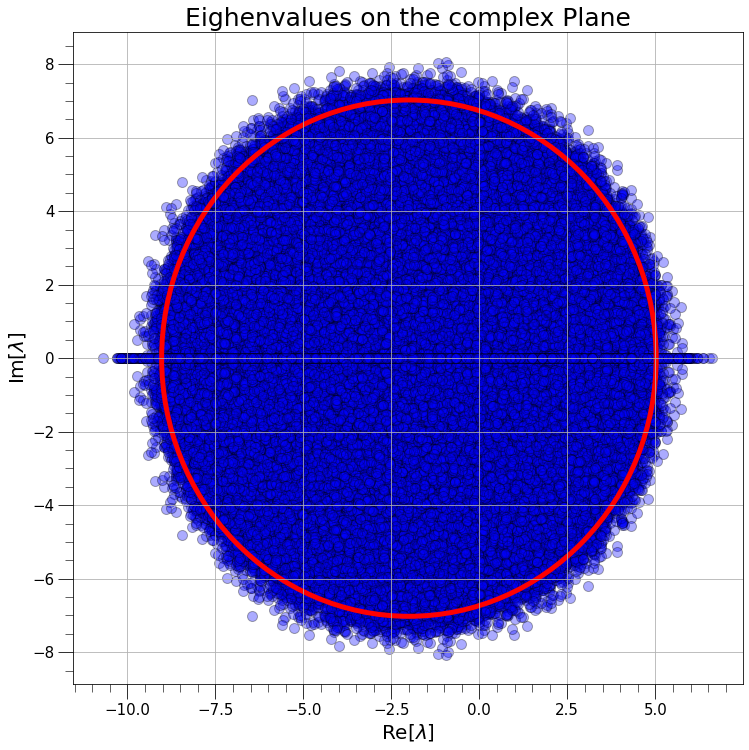

In [11]:
mu, sigma = 0, 1      # mean and standard deviation

circle = plt.Circle((-d,0), np.sqrt(S*prob*sigma**2), color='red', fill=False, linewidth=5)  

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for i in range(1000):

    mat = np.random.normal(mu, sigma, (S,S))    #random SxS matrix of normal distribution

    r_mat = mat.copy()
    r_mat[C==0] = 0            #set to 0 the elements of the matrix that are 0 in C

    
    np.fill_diagonal(r_mat, -1*diag)   #set the diagonal to -d
    eighenvalues, _ = np.linalg.eig(r_mat)
    ax.scatter(np.real(eighenvalues), np.imag(eighenvalues), label='Realization {}'.format(i+1), 
               s=100, edgecolors='black', color='blue', alpha=0.33)
    

ax.add_patch(circle)
ax.set_title('Eighenvalues on the complex Plane', fontsize = 25)    
ax.set_xlabel('Re[$\\lambda$]', fontsize = 20)
ax.set_ylabel('Im[$\\lambda$]', fontsize = 20)         


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

As we expected from the **Circular Law**, from this plot we can see that the eigenvalues are distributed in a disk (the red line) with radius $$ r = \sqrt{S \cdot C \cdot \sigma^2} $$